# Real estate 
## EDA

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Aditi k\OneDrive\Desktop\aditi\courses\ML HCF notes\15 projects HCF\Real_Estate_capstone_project\data.csv")

In [126]:
#Q1 – Shape of the dataset
print(df.shape)

(511, 14)


In [127]:
#Q2 – Data types and memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB
None


In [128]:
#Q3 – First 5 rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [129]:
#Q4 – Summary statistics
df.describe(include='all')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [130]:
#Q5 – Count missing values per column
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [131]:
#Q6 – Percentage of missing values
(df.isnull().mean() * 100).round(2)


CRIM       0.00
ZN         0.00
INDUS      0.00
CHAS       0.00
NOX        0.00
RM         0.98
AGE        0.00
DIS        0.00
RAD        0.00
TAX        0.00
PTRATIO    0.00
B          0.00
LSTAT      0.00
MEDV       0.00
dtype: float64

In [132]:
#Q7 – Duplicate rows
df.duplicated().sum()


np.int64(0)

In [133]:
#Q8 – Unique values in each column
df.nunique()


CRIM       509
ZN          26
INDUS       79
CHAS         2
NOX         82
RM         444
AGE        357
DIS        416
RAD          9
TAX         67
PTRATIO     47
B          360
LSTAT      460
MEDV       231
dtype: int64

In [134]:
#Q9 – Separate numeric & categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numeric:", num_cols)
print("Categorical:", cat_cols)



Numeric: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Categorical: []


In [135]:
#Q10 – Min and Max values for numeric columns
df[num_cols].agg(['min', 'max'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
min,0.00632,0.0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5.0
max,88.97620,100.0,27.74,1,0.871,8.780,100.0,12.1265,24,711,23.0,396.90,76.00,67.0


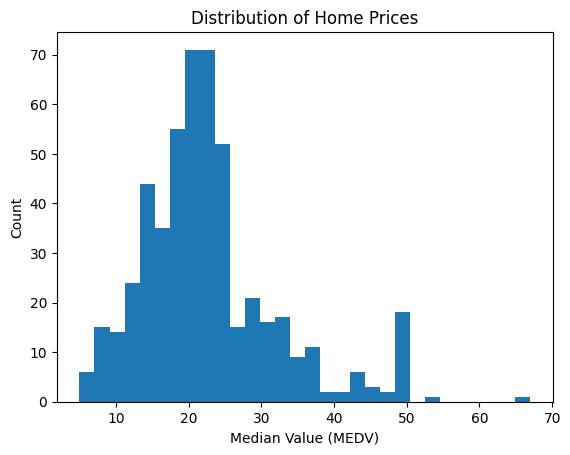

In [136]:
#Q11 – Histogram for a numeric column 
plt.hist(df['MEDV'], bins=30)
plt.xlabel("Median Value (MEDV)")
plt.ylabel("Count")
plt.title("Distribution of Home Prices")
plt.show()


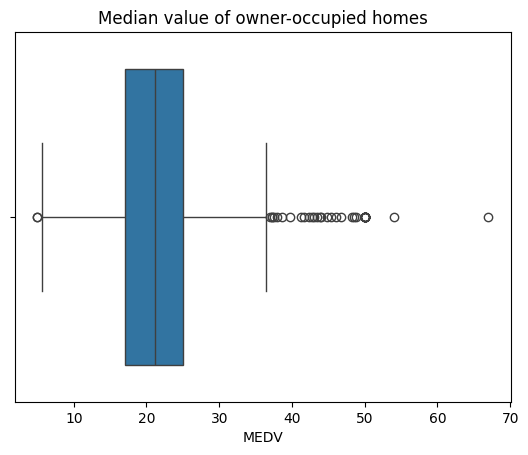

In [137]:
#Q12 – Boxplot for a numeric column
sns.boxplot(x=df['MEDV'])
plt.title("Median value of owner-occupied homes")
plt.show()


In [138]:
#Q13 – Value counts for a categorical column
df['RAD'].value_counts()


RAD
24    132
5     115
4     110
3      43
6      26
8      24
2      24
1      20
7      17
Name: count, dtype: int64

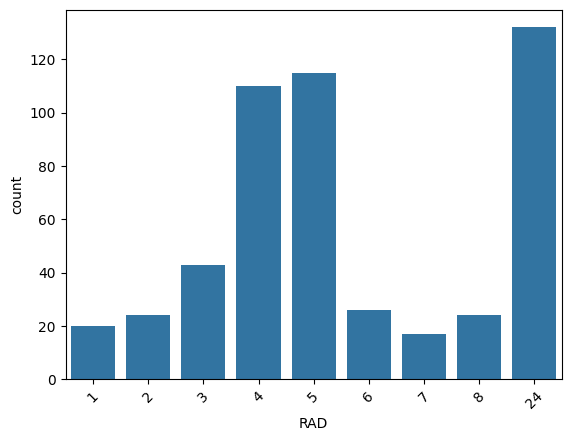

In [139]:
#Q14 – Barplot for a categorical column
sns.countplot(x='RAD', data=df)
plt.xticks(rotation=45)
plt.show()


In [140]:
#Q15 – Skewness & Kurtosis for numeric columns
from scipy.stats import skew, kurtosis

for col in num_cols:
    print(f"{col}: Skewness={skew(df[col], nan_policy='omit'):.2f}, Kurtosis={kurtosis(df[col], nan_policy='omit'):.2f}")


CRIM: Skewness=5.23, Kurtosis=37.12
ZN: Skewness=2.24, Kurtosis=4.06
INDUS: Skewness=0.29, Kurtosis=-1.22
CHAS: Skewness=3.42, Kurtosis=9.67
NOX: Skewness=0.73, Kurtosis=-0.05
RM: Skewness=0.39, Kurtosis=1.83
AGE: Skewness=-0.60, Kurtosis=-0.96
DIS: Skewness=1.02, Kurtosis=0.51
RAD: Skewness=1.02, Kurtosis=-0.84
TAX: Skewness=0.68, Kurtosis=-1.12
PTRATIO: Skewness=-0.73, Kurtosis=-0.25
B: Skewness=-2.89, Kurtosis=7.22
LSTAT: Skewness=1.80, Kurtosis=8.36
MEDV: Skewness=1.22, Kurtosis=2.03


In [141]:
#Q16 – Correlation matrix
df.corr(numeric_only=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198451,0.405524,-0.054906,0.420524,-0.220363,0.350847,-0.377028,0.625964,0.583389,0.276695,-0.384356,0.405030,-0.380072
ZN,-0.198451,1.000000,-0.534106,-0.041333,-0.516256,0.307812,-0.567796,0.665185,-0.307146,-0.311531,-0.392844,0.175637,-0.390029,0.339767
INDUS,0.405524,-0.534106,1.000000,0.062332,0.763583,-0.392193,0.642817,-0.707886,0.591784,0.718764,0.379441,-0.356955,0.556707,-0.463269
CHAS,-0.054906,-0.041333,0.062332,1.000000,0.091023,0.089952,0.085814,-0.097541,-0.005343,-0.034244,-0.124415,0.048970,-0.057013,0.164782
NOX,0.420524,-0.516256,0.763583,0.091023,1.000000,-0.301778,0.729233,-0.768309,0.609343,0.666982,0.186073,-0.379936,0.540050,-0.411486
RM,-0.220363,0.307812,-0.392193,0.089952,-0.301778,1.000000,-0.237335,0.199853,-0.213078,-0.293969,-0.339755,0.127888,-0.553126,0.667695
AGE,0.350847,-0.567796,0.642817,0.085814,0.729233,-0.237335,1.000000,-0.745097,0.452229,0.503360,0.258251,-0.271925,0.529994,-0.368203
DIS,-0.377028,0.665185,-0.707886,-0.097541,-0.768309,0.199853,-0.745097,1.000000,-0.488474,-0.530379,-0.238155,0.290997,-0.467063,0.233469
RAD,0.625964,-0.307146,0.591784,-0.005343,0.609343,-0.213078,0.452229,-0.488474,1.000000,0.910211,0.438646,-0.442406,0.422389,-0.379016
TAX,0.583389,-0.311531,0.718764,-0.034244,0.666982,-0.293969,0.503360,-0.530379,0.910211,1.000000,0.440962,-0.440830,0.482088,-0.459274


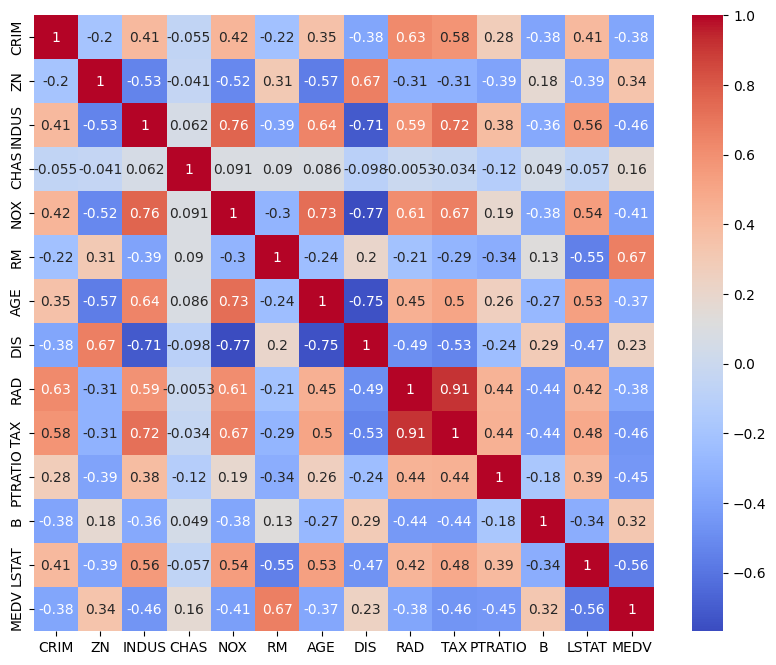

In [142]:
#Q17 – Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


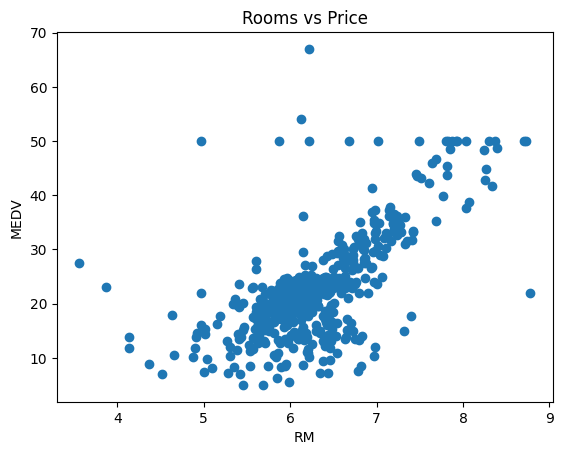

In [143]:
#Q18 – Scatter plot between RM and MEDV
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel("RM")      # Average number of rooms per dwelling
plt.ylabel("MEDV")    # Median value of homes
plt.title("Rooms vs Price")
plt.show()



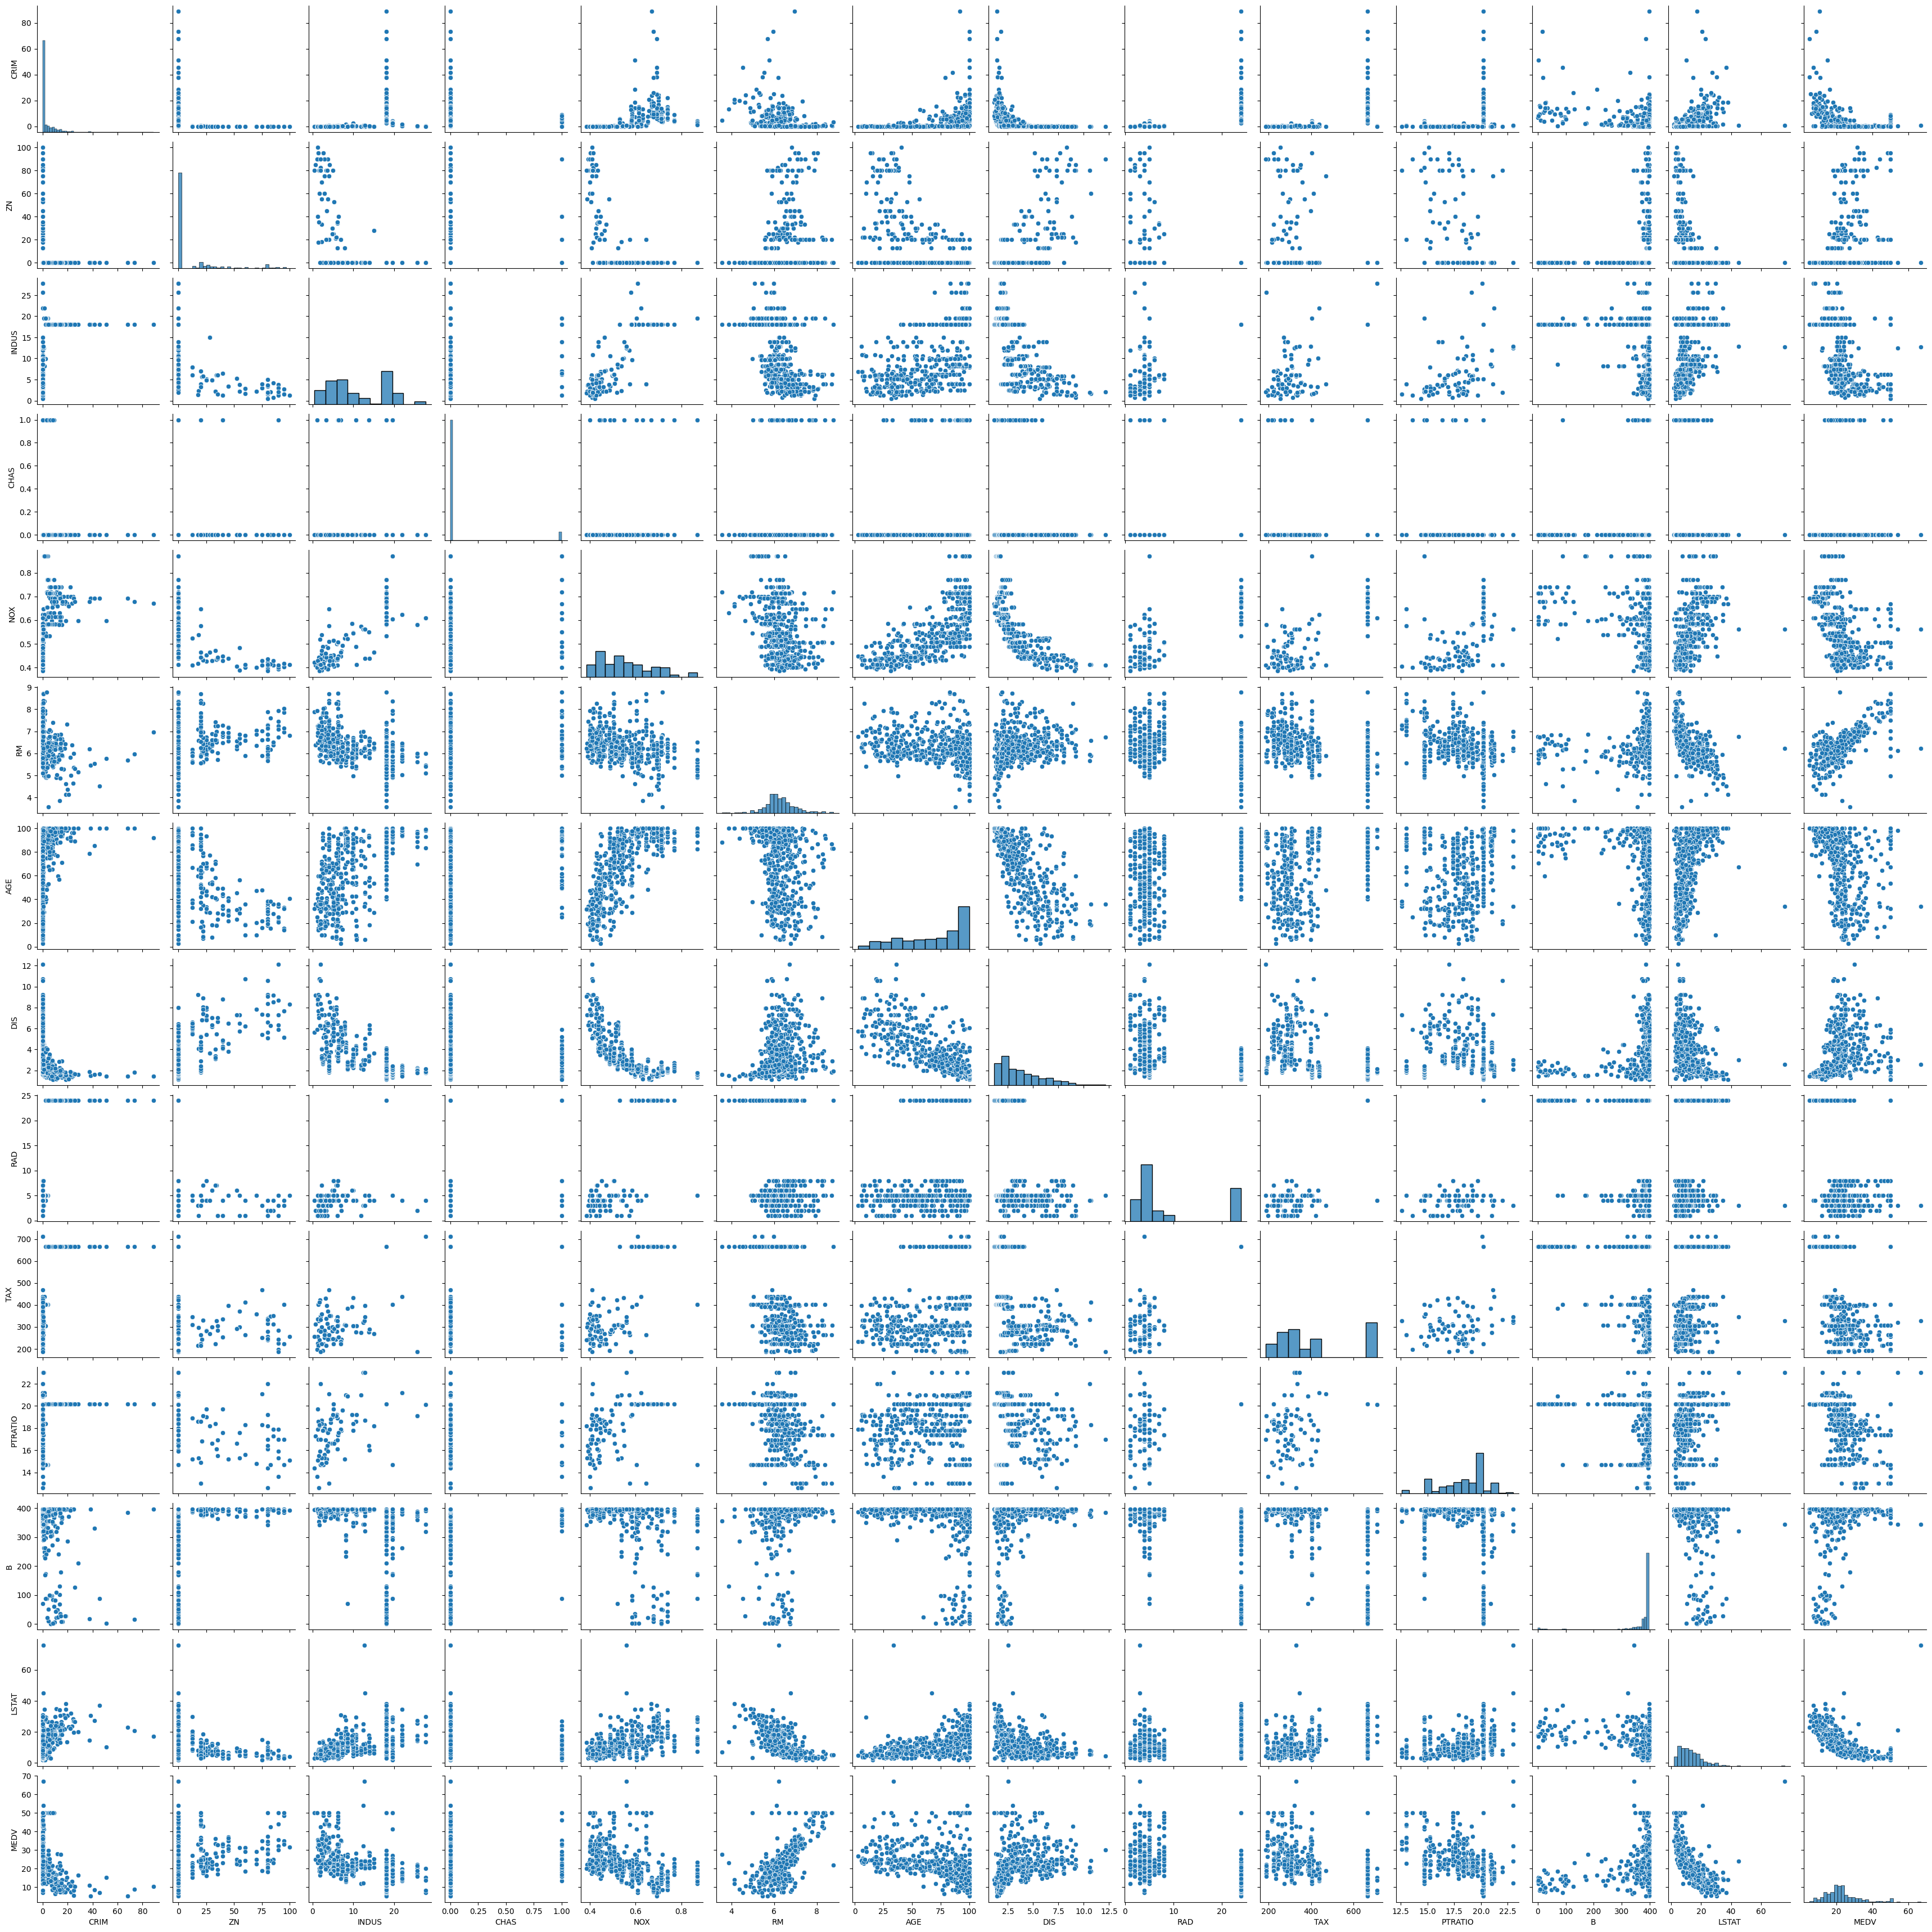

In [144]:
#Q19 – Pairplot of numeric columns
sns.pairplot(df[num_cols])
plt.show()


In [145]:
#Q20 – Grouped average RAD by MEDV
df.groupby('RAD')['MEDV'].mean().sort_values(ascending=False)

RAD
8     30.358333
3     29.076744
7     27.105882
2     26.833333
5     25.706957
1     24.365000
4     21.387273
6     20.976923
24    16.403788
Name: MEDV, dtype: float64

In [146]:
#Q21 – Median MEDV by RAD
df.groupby('RAD')['MEDV'].median().sort_values(ascending=False)


RAD
8     28.25
3     26.60
7     26.20
2     23.85
5     23.00
1     22.20
6     21.20
4     20.45
24    14.40
Name: MEDV, dtype: float64

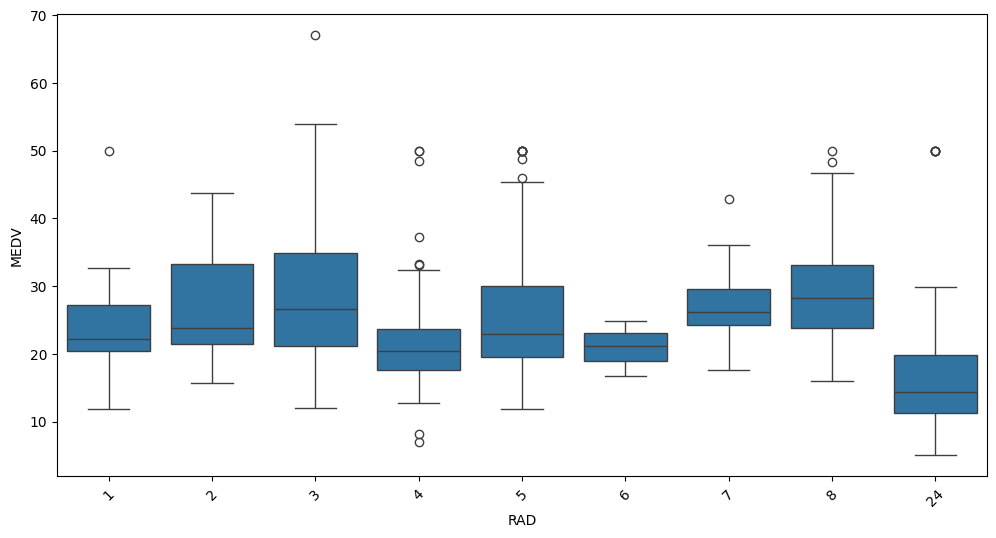

In [148]:
#Q22 – Price distribution by RAD (Boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(x='RAD', y='MEDV', data=df)
plt.xticks(rotation=45)
plt.show()


In [149]:
#Q23 – Detect outliers using IQR method for MEDV
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['MEDV'] < Q1 - 1.5*IQR) | (df['MEDV'] > Q3 + 1.5*IQR)]
outliers


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9


In [150]:
#Q24 – Remove MEDV outliers (IQR method)
df_no_outliers = df[(df['MEDV'] >= Q1 - 1.5*IQR) & (df['MEDV'] <= Q3 + 1.5*IQR)]
df_no_outliers.shape


(469, 14)

In [151]:
#Q25 – Missing value imputation (Mean for numeric)
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\Aditi k\AppData\Local\Temp\ipykernel_19608\2947754319.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [153]:
#Q26 – Missing value imputation (Mode for categorical)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [154]:
#Q27 – Encoding categorical variables (Label Encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [155]:
#Q28 – One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [160]:
#Q29 – Standard Scaling numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.418162,0.290691,-1.296065,-0.271163,-0.145462,0.410788,-0.121697,0.146011,-0.977576,-0.664367,-1.455741,0.443853,-1.014091,0.139083
1,-0.415709,-0.484767,-0.598270,-0.271163,-0.744435,0.190681,0.366340,0.564360,-0.862368,-0.986295,-0.318443,0.443853,-0.480058,-0.114216
2,-0.415712,-0.484767,-0.598270,-0.271163,-0.744435,1.282643,-0.267752,0.564360,-0.862368,-0.986295,-0.318443,0.399027,-1.136046,1.268373
3,-0.415118,-0.484767,-1.315123,-0.271163,-0.839924,1.015370,-0.812787,1.086688,-0.747160,-1.105528,0.090984,0.418852,-1.275973,1.131170
4,-0.410831,-0.484767,-1.315123,-0.271163,-0.839924,1.228331,-0.513552,1.086688,-0.747160,-1.105528,0.090984,0.443853,-0.969161,1.426685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,-0.303468,-0.484767,0.197743,-0.271163,0.054196,0.989643,0.726134,-0.804109,-0.747160,-0.521287,2.047135,0.433941,-0.112911,-1.127411
507,-0.391487,-0.484767,0.197743,-0.271163,0.054196,0.989643,0.263033,-0.538915,-0.747160,-0.521287,2.047135,-0.149800,1.555942,0.983412
508,-0.366969,-0.484767,0.197743,-0.271163,0.054196,-0.235242,1.046742,-0.380084,-0.747160,-0.521287,2.047135,-0.149800,1.042449,3.305317
509,-0.328015,-0.484767,0.227062,-0.271163,0.054196,-0.093744,-1.233140,-0.591858,-0.747160,-0.467633,2.047135,-0.149800,8.102980,4.677352


In [157]:
#Q30 – MinMax Scaling numeric features
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
df[num_cols] = mm.fit_transform(df[num_cols])


In [161]:
#Q31 – Creating new feature: Price per Square Foot
df['Price_per_sqft'] = df['MEDV'] / df['RM']
df[['MEDV', 'RM', 'Price_per_sqft']].head()



,MEDV,RM,Price_per_sqft
0,0.139083,0.410788,0.338576
1,-0.114216,0.190681,-0.598990
2,1.268373,1.282643,0.988874
3,1.131170,1.015370,1.114047
4,1.426685,1.228331,1.161482


In [172]:
#Q32 – Creating new feature: Age of Property
current_year = 2025
df['YearBuilt'] = 1970 - (df['AGE'] / 100 * (1970 - 1940))
df['Property_Age'] = current_year - df['YearBuilt']
df['Property_Age']


0      54.963491
1      55.109902
2      54.919674
3      54.756164
4      54.845934
         ...    
506    55.217840
507    55.078910
508    55.314023
509    54.630058
510    54.982727
Name: Property_Age, Length: 511, dtype: float64

In [164]:
#Q33 – Top 10 expensive properties
df.nlargest(10, 'MEDV')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price_per_sqft,YearBuilt,Property_Age
509,-0.328015,-0.484767,0.227062,-0.271163,0.054196,-0.093744,-1.233140,-0.591858,-0.747160,-0.467633,2.047135,-0.149800,8.102980,4.677352,-49.894771,1970.369942,54.630058
508,-0.366969,-0.484767,0.197743,-0.271163,0.054196,-0.235242,1.046742,-0.380084,-0.747160,-0.521287,2.047135,-0.149800,1.042449,3.305317,-14.050703,1969.685977,55.314023
161,-0.247869,-0.484767,1.235640,-0.271163,0.436151,1.717142,0.790256,-0.864731,-0.516744,-0.026472,-1.728692,0.196369,-1.431304,2.883153,1.679042,1969.762923,55.237077
162,-0.204577,-0.484767,1.235640,3.687818,0.436151,2.164503,1.053867,-0.831439,-0.516744,-0.026472,-1.728692,0.363562,-1.406913,2.883153,1.332016,1969.683840,55.316160
163,-0.241364,-0.484767,1.235640,3.687818,0.436151,2.983475,0.900687,-0.773583,-0.516744,-0.026472,-1.728692,0.350785,-1.227191,2.883153,0.966374,1969.729794,55.270206
166,-0.183957,-0.484767,1.235640,-0.271163,0.436151,2.346021,0.982621,-0.828959,-0.516744,-0.026472,-1.728692,0.139868,-1.178409,2.883153,1.228955,1969.705214,55.294786
186,-0.412354,-0.484767,-1.274076,-0.271163,-0.579501,2.205952,-0.534926,-0.278872,-0.747160,-1.278415,-0.318443,0.396824,-1.082129,2.883153,1.306988,1970.160478,54.839522
195,-0.417287,2.961713,-1.567267,-0.271163,-1.152432,2.268840,-1.304386,0.889318,-0.631952,-0.908794,-1.865168,0.414446,-1.272121,2.883153,1.270761,1970.391316,54.608684
204,-0.416553,3.607928,-1.241825,-0.271163,-1.203649,2.496094,-1.307949,0.636334,-0.631952,-1.093605,-1.728692,0.373915,-1.283675,2.883153,1.155066,1970.392385,54.607615
225,-0.357315,-0.484767,-0.725809,-0.271163,-0.440608,3.483720,0.512395,-0.424252,-0.171121,-0.598789,-0.500411,0.279745,-1.059022,2.883153,0.827607,1969.846282,55.153718


In [165]:
#Q34 – Bottom 10 cheapest properties
df.nsmallest(10, 'MEDV')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price_per_sqft,YearBuilt,Property_Age
398,4.063518,-0.484767,1.018678,-0.271163,1.200059,-1.192853,1.117989,-1.094296,1.672205,1.541439,0.773362,0.443853,2.273549,-1.866199,1.564483,1969.664603,55.335397
405,7.519436,-0.484767,1.018678,-0.271163,1.200059,-0.864121,1.117989,-1.124917,1.672205,1.541439,0.773362,0.312457,1.296628,-1.866199,2.159649,1969.664603,55.335397
400,2.508396,-0.484767,1.018678,-0.271163,1.200059,-0.429623,1.117989,-1.046981,1.672205,1.541439,0.773362,0.443853,1.783163,-1.802874,4.196410,1969.664603,55.335397
399,0.740109,-0.484767,1.018678,-0.271163,1.200059,-0.622574,0.327154,-1.089145,1.672205,1.541439,0.773362,-0.203108,2.193957,-1.728995,2.777170,1969.901854,55.098146
414,4.927737,-0.484767,1.018678,-0.271163,1.200059,-2.527792,1.117989,-1.013879,1.672205,1.541439,0.773362,-2.955391,3.093854,-1.655116,0.654768,1969.664603,55.335397
489,-0.397469,-0.484767,2.431859,-0.271163,0.470874,-1.248595,1.057429,-0.967518,-0.631952,1.809713,0.727870,-0.138235,1.423718,-1.655116,1.325583,1969.682771,55.317229
385,1.546001,-0.484767,1.018678,-0.271163,1.260824,-1.444405,1.050305,-1.124584,1.672205,1.541439,0.773362,0.443853,2.301791,-1.634008,1.131267,1969.684909,55.315091
401,1.244974,-0.484767,1.018678,-0.271163,1.200059,0.079197,1.117989,-1.053992,1.672205,1.541439,0.773362,0.443853,0.955155,-1.634008,-20.632091,1969.664603,55.335397
415,1.694761,-0.484767,1.018678,-0.271163,1.078528,0.209261,1.117989,-0.929694,1.672205,1.541439,0.773362,-3.627464,2.075854,-1.634008,-7.808468,1969.664603,55.335397
387,2.222166,-0.484767,1.018678,-0.271163,1.260824,-1.840313,0.743945,-1.080559,1.672205,1.541439,0.773362,0.443853,2.453271,-1.612900,0.876427,1969.776816,55.223184


In [ ]:
#Q35 – Average Price per Bedroom (using RM as proxy for bedrooms)
df.groupby('RM')['MEDV'].mean().sort_values(ascending=False)


RM
-0.093744    4.677352
-0.235242    3.305317
 3.483720    2.883153
 3.453705    2.883153
 1.717142    2.883153
               ...   
-1.248595   -1.655116
-0.622574   -1.728995
-0.429623   -1.802874
-1.192853   -1.866199
-0.864121   -1.866199
Name: MEDV, Length: 445, dtype: float64

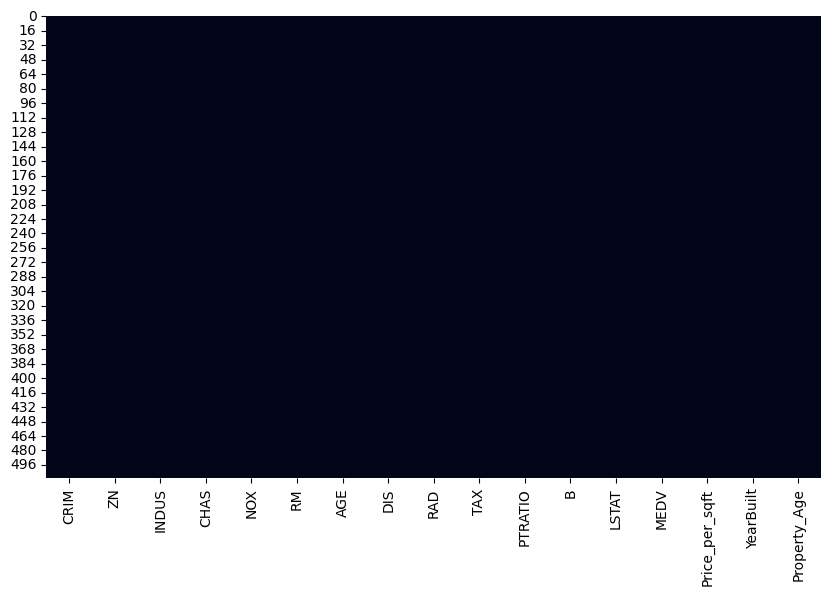

In [168]:
#Q36 – Heatmap of missing values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [169]:
df.isnull().sum()

CRIM              0
ZN                0
INDUS             0
CHAS              0
NOX               0
RM                0
AGE               0
DIS               0
RAD               0
TAX               0
PTRATIO           0
B                 0
LSTAT             0
MEDV              0
Price_per_sqft    0
YearBuilt         0
Property_Age      0
dtype: int64

In [170]:
#Q37 – Correlation of features with Price
df.corr(numeric_only=True)['MEDV'].sort_values(ascending=False)


MEDV              1.000000
RM                0.666954
YearBuilt         0.368203
ZN                0.339767
B                 0.317941
DIS               0.233469
CHAS              0.164782
Price_per_sqft    0.047102
Property_Age     -0.368203
AGE              -0.368203
RAD              -0.379016
CRIM             -0.380072
NOX              -0.411486
PTRATIO          -0.447464
TAX              -0.459274
INDUS            -0.463269
LSTAT            -0.562960
Name: MEDV, dtype: float64

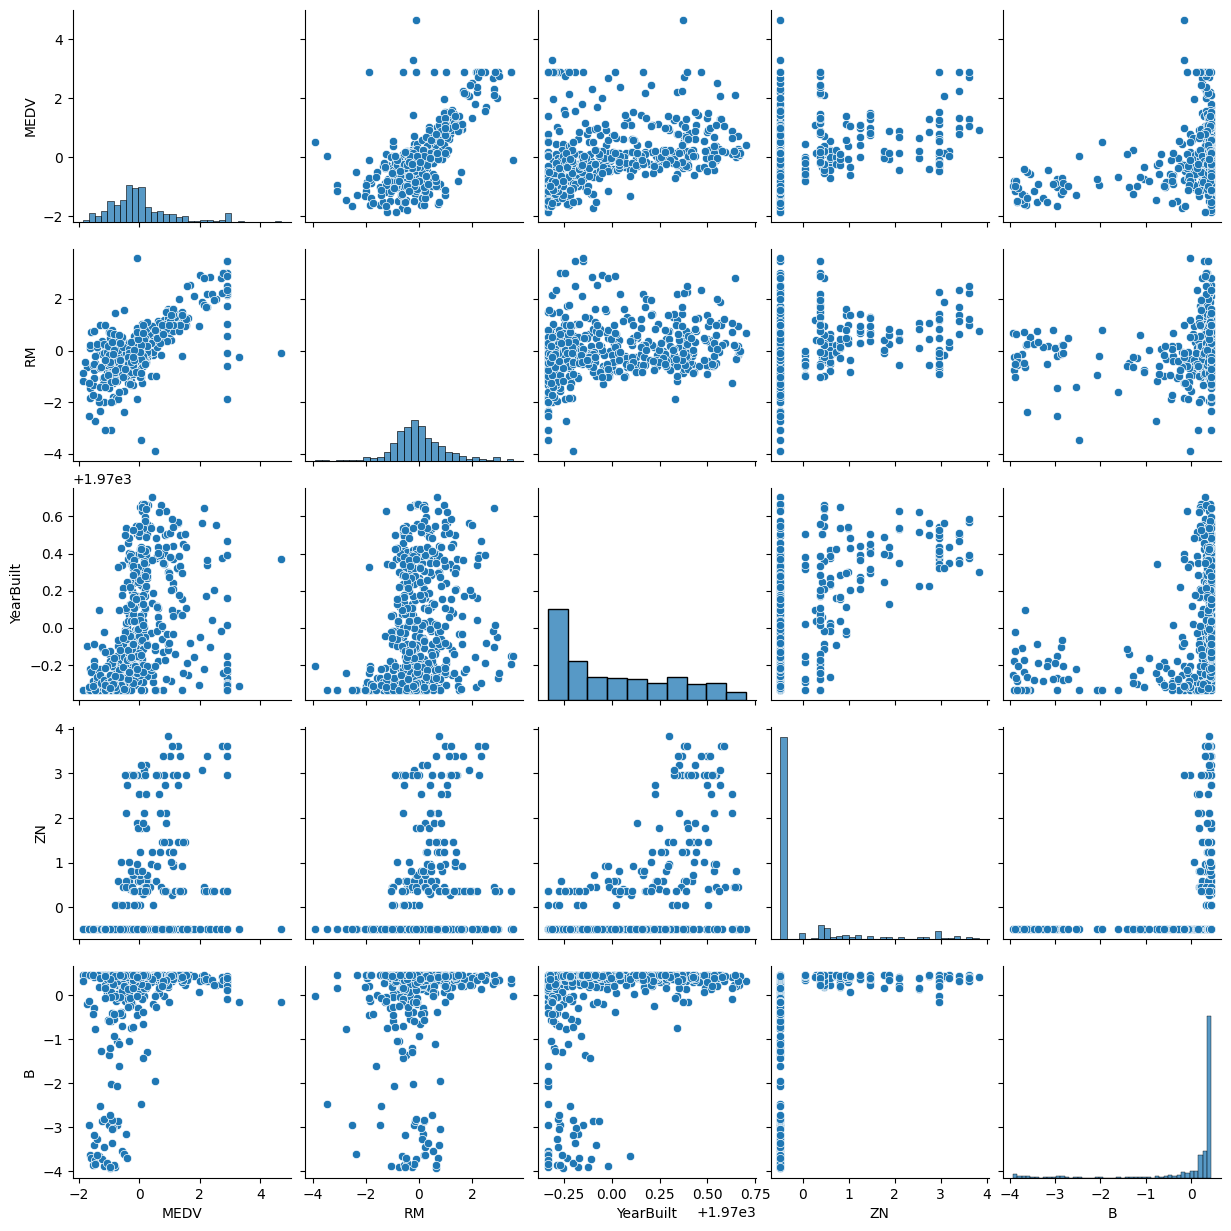

In [173]:
#Q38 – Pairwise plot of top correlated features with MEDV
top_corr_features = df.corr(numeric_only=True)['MEDV'].nlargest(5).index
sns.pairplot(df[top_corr_features])
plt.show()

c:\Users\Aditi k\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


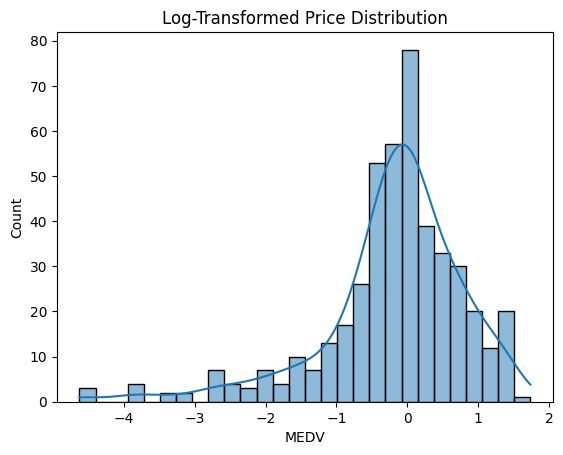

In [174]:
#Q39 – Distribution of Price after log transformation
import numpy as np
sns.histplot(np.log1p(df['MEDV']), kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()


In [175]:
#Q40 – Save cleaned dataset

df.to_csv("real_estate_cleaned.csv", index=False)
